<a href="https://colab.research.google.com/github/Deepakj98-98/Linear-Regression-with-feature-engineering/blob/main/Linear_Regression_with_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>
    Group No 21_Forest Fires DataSet
</h2>    

<br>
2022ac05034 DEEPAK J BHAT
<br>

## 1.2 __Importing libraries__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score,  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
from google.colab import drive
sns.set_theme(style="whitegrid")
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 __Importing Dataset__


In [ ]:
forest=pd.read_csv("/content/drive/MyDrive/ForestFireData/forestfires.csv")

# 2. __Data Visualization and Exploration__

In [ ]:
forest.shape

(517, 13)

No of Rows in the Data set = 517
<br>
No of columns in Data set = 13

## 2.1 __Printing first two rows of data__

In [ ]:
forest.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


From above printed 2 rows and info we can conclude that :
There are 13 columns in dataframe
There is no NULL Values or missing Values in all the columns
From the name of the dataset, we can infer
    given data set is about the forest fire information , area burnt by fire is likely dependent on other 12 columns.

Since there is no output (Y) column mentioned in the question meta data, we are considering Area as the target column which is dependent on the rest of the columns

## 2.2 __Checking the imbalance in the class__

In [ ]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


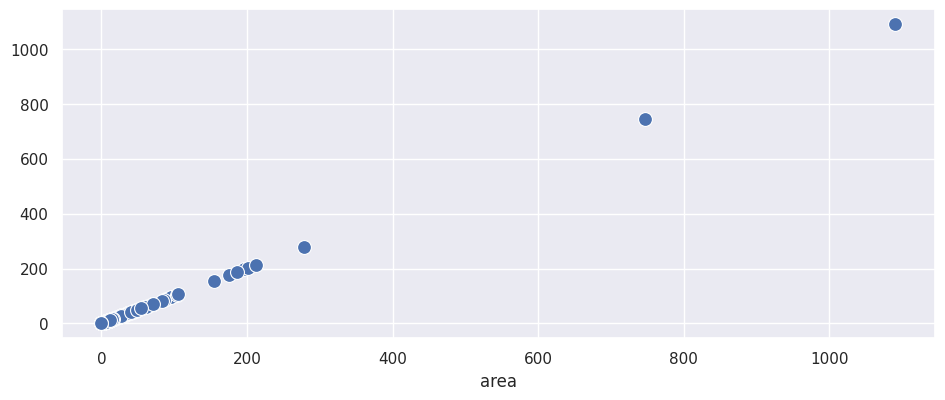

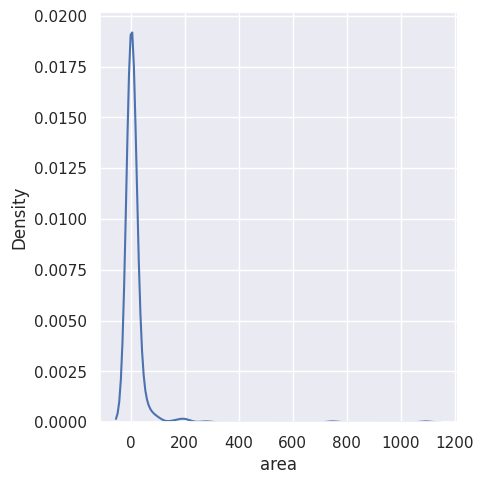

In [ ]:
sns.set(rc={'figure.figsize':(11.27,4.27)})
plt.rcParams['lines.markersize'] = 10
sns.scatterplot(data=forest, x=forest['area'], y=forest['area'].tolist())
sns.displot(forest['area'],kind="kde")
plt.show()

In [ ]:
print("No of Rows that are having Area as zero", (forest['area'].values == 0).sum())
print("No of Rows that are having Rain as zero", (forest['rain'].values == 0).sum())

No of Rows that are having Area as zero 247
No of Rows that are having Rain as zero 509


**By above two plots(Scatterplot and displot) we get to know data is skewed and we can see outliers at ~1000. In other words the data appears to be right skewed.**

**As we can see there is an imbalance in area and rain since out of total 517 records, there are 247 records in 'Area' having value 0
and 509 records that are having rain as value 0
Thus we can say that class is skewed towards zero. Let us visualize the imbalance in order to draw out more inferences for class imbalance
We can also see some outliers in the area and rain graphs**

## 2.3 __Provide appropriate visualizations to get an insight about the dataset.__

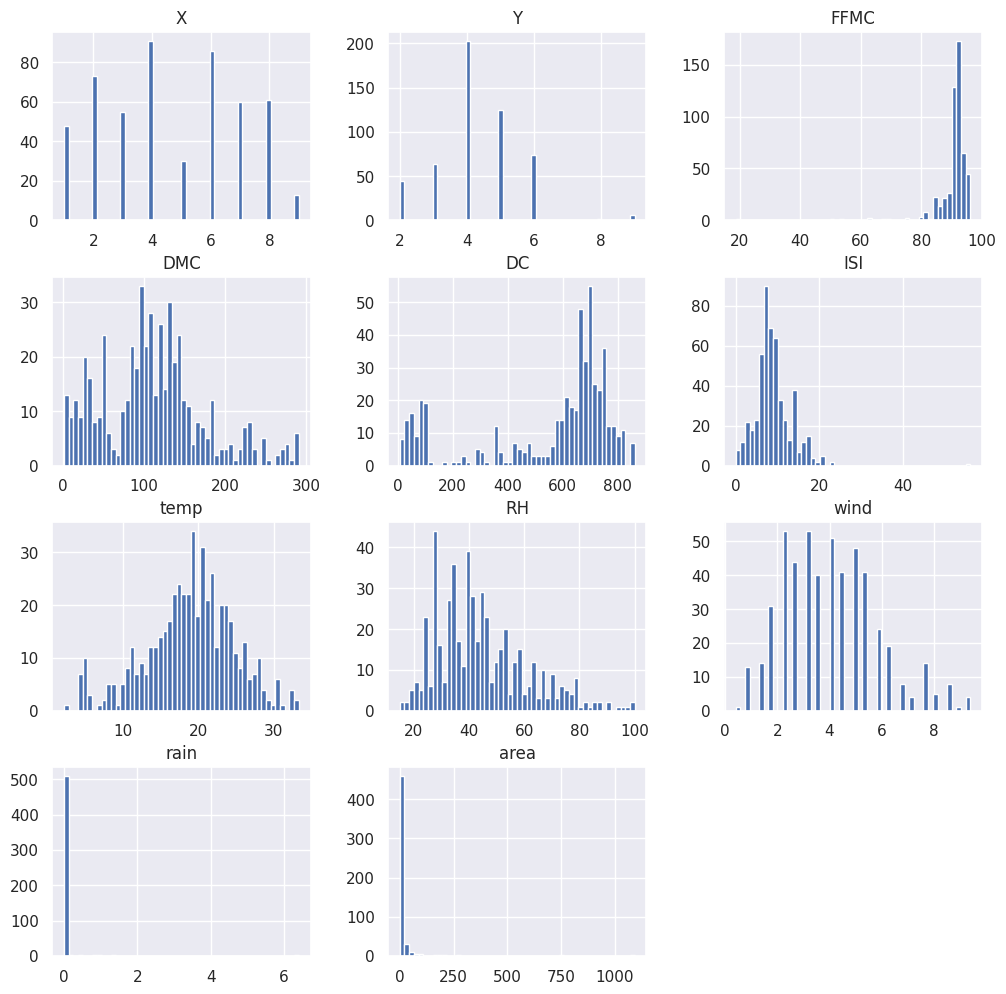

In [ ]:
forest.hist(bins=50, figsize=(12,12))
plt.show()

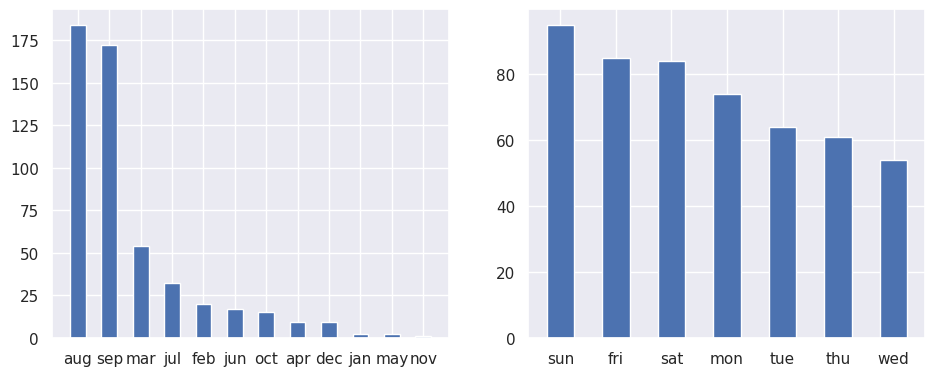

In [ ]:
# Printing categorical attributes month and day using bar graphs
categories = forest['month'].value_counts().index
counts = forest['month'].value_counts().values
plt.subplot(1, 2, 1)
plt.bar(categories, counts, width=0.5)


categories = forest['day'].value_counts().index
counts = forest['day'].value_counts().values
plt.subplot(1, 2, 2)
plt.bar(categories, counts, width=0.5)
plt.show()

**Insights from the data visualization**

Data is positively skewed: ISI Rain, area
Data is negatively skewed: FFMC

DC is also having larger number of values around 600-800 range.
From the graph there are not many unique values for X and Y.
Based upon this we can assume that X and Y are (X,Y) Geosaptial coordinates of area affected by fire

Since, Area and Rain values are highly skewed, we will take the approach to convert the values during data pre-processing.

As per above visualizations we can see that day of the week is not impacting area burnt.
Hence will drop the column 'Day' during data pre-processing.

## 2.4 Do the correlational analysis on the dataset.

<ipython-input-14-47c4437cb480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  All_correlation_matrix = forest.corr()


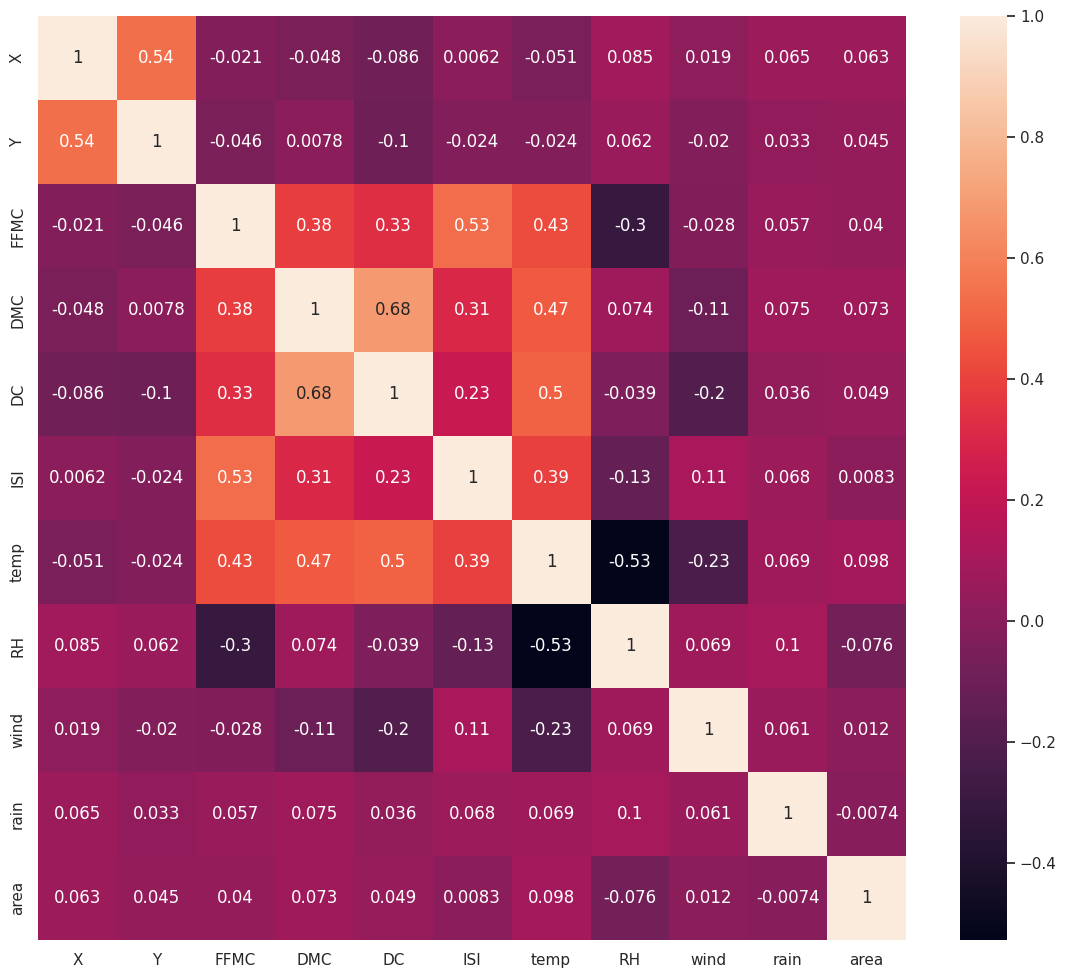

In [ ]:
All_correlation_matrix = forest.corr()
plt.rcParams['figure.figsize'] = [14, 12]
sns.set(font_scale = 1)
sns.heatmap(All_correlation_matrix, annot = True);

**DC and DMC are having highest correlation with each other i.e.0.68
DC is having lower correlation with Area[0.05] than DMC with Area [0.073]**

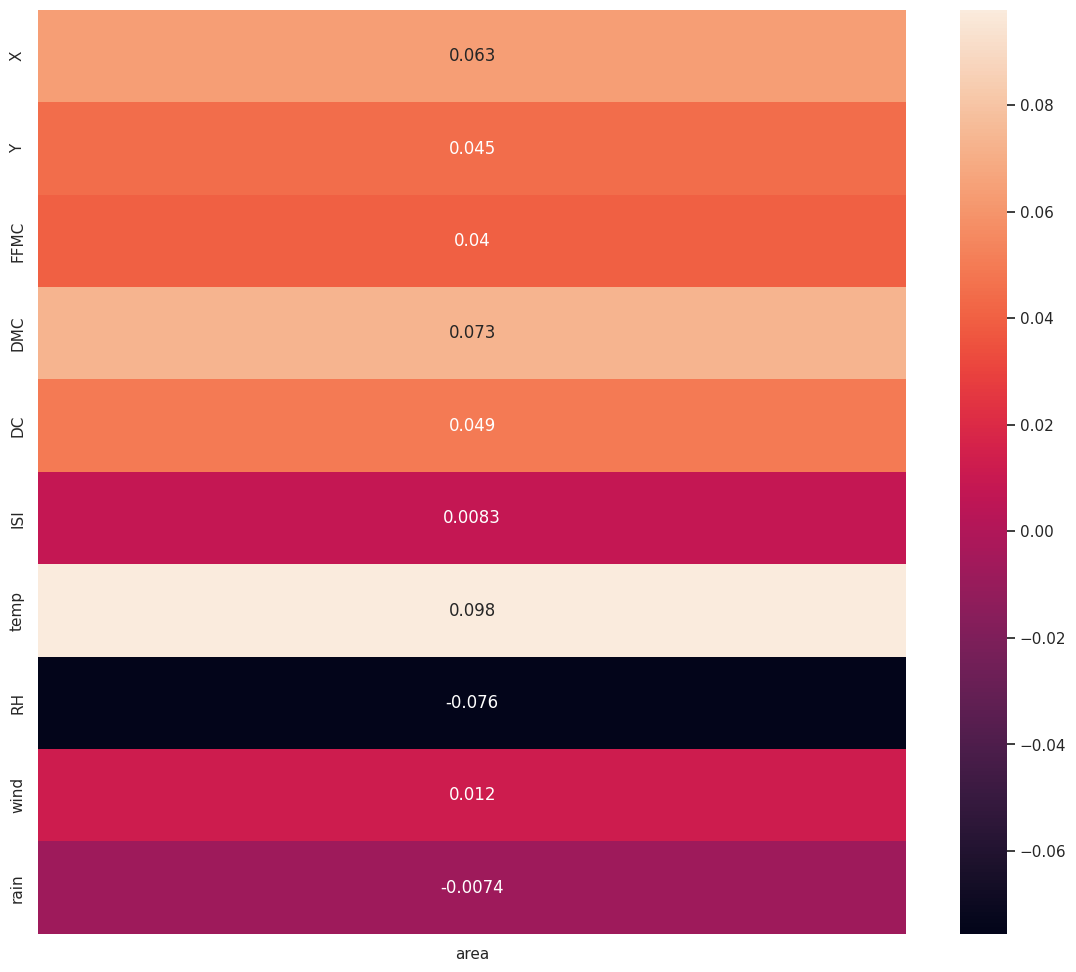

In [ ]:
plt.rcParams['figure.figsize'] = [14, 12]
sns.set(font_scale = 1)
sns.heatmap(All_correlation_matrix[['area']].drop('area'), annot = True);

**From this correlation we understand which attributes have a +ve correlation(Temp, DMC,DC, RH) with target variable. DC and DMC are correlated to each other (0.68) and DMC is having higher correlation with area than DC but since correlation is not more than 0.75 in any case we will keep all features**

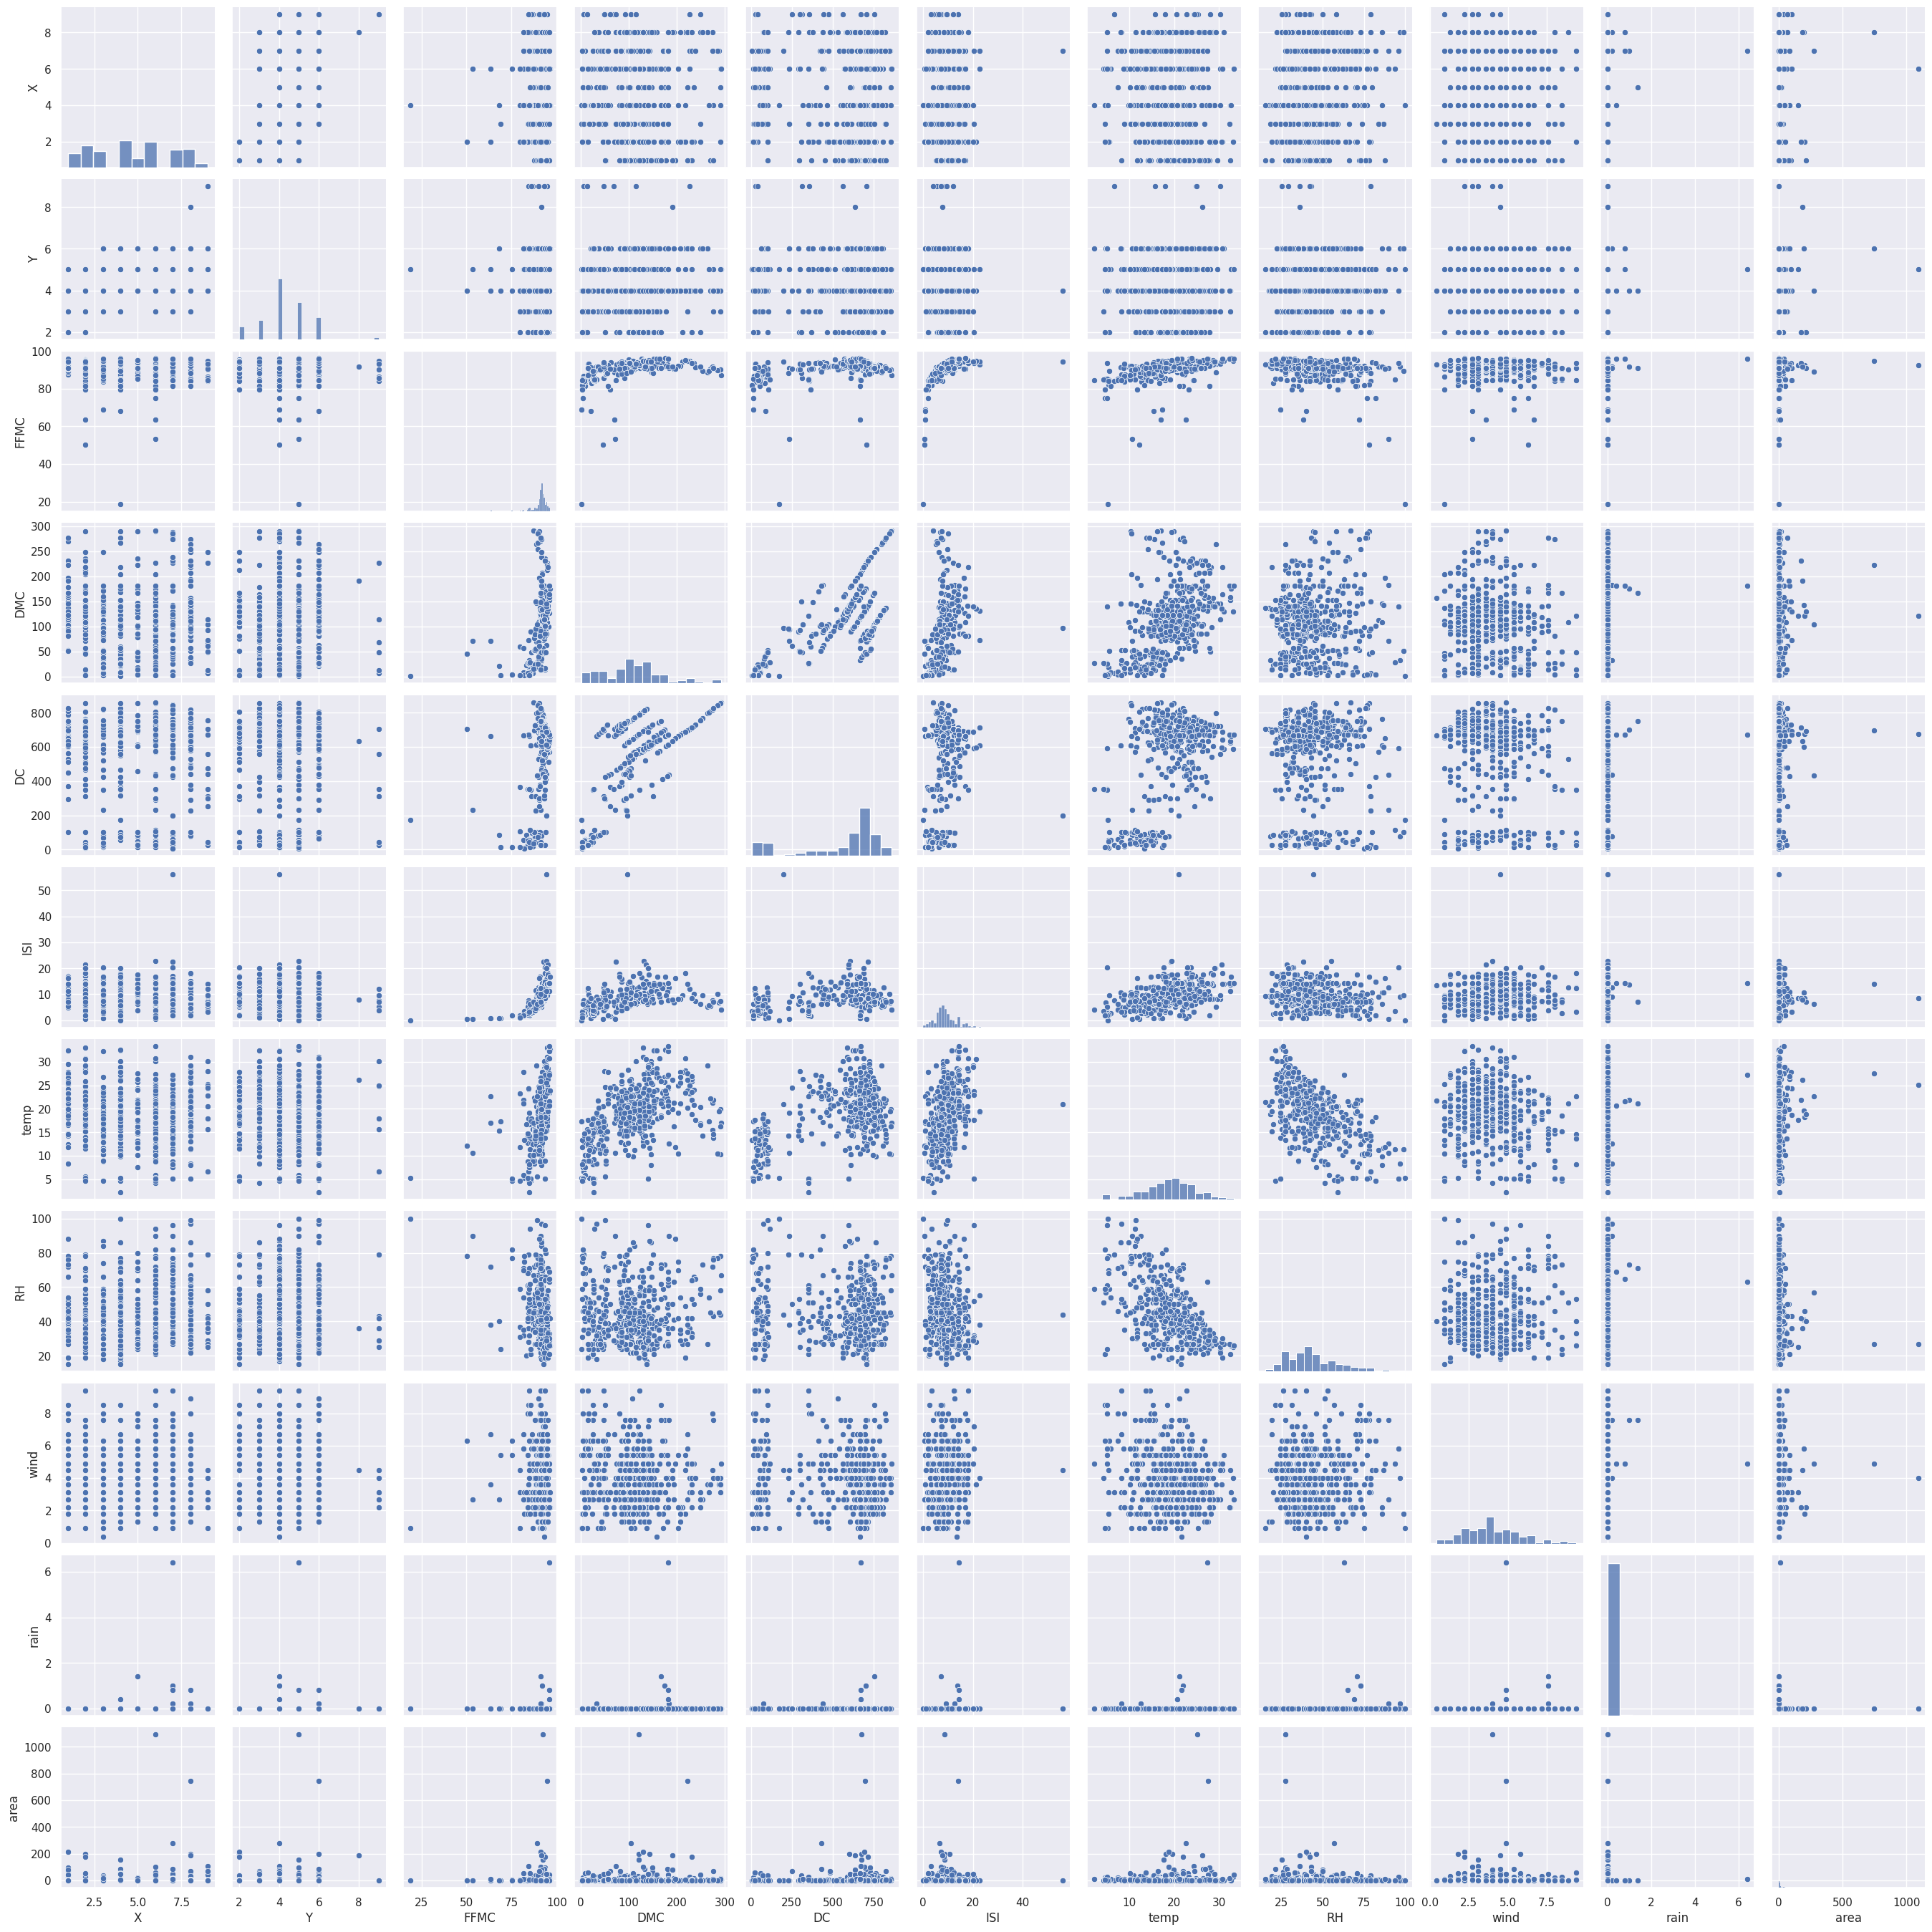

In [ ]:
sns.pairplot(forest)
plt.show()

# 3. __Data Preprocessing and Cleaning__

## 3.1 Identfying Null or Missing values

In [ ]:
forest.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

**Data set is not having any null or missing values**

## 3.1 Data Pre-processing Tasks:

In [ ]:
forest['area_new'] = np.log1p(forest['area'])
forest['rain_new'] = np.log1p(forest['rain'])

forest.month = forest.month.astype('category')
# month is categorical therefore no weightage should be for month value

forest = forest.drop(['day'], axis=1)
forest = forest.drop(['X'], axis=1)
forest = forest.drop(['Y'], axis=1)

forest.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_new,rain_new
0,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,0.000000
1,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,0.000000
2,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,0.000000
3,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,0.182322
4,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,0.000000


**We are converting area and rain to log(x+1) since these two are having larger count of zero value
Also month is a categorical data so converting type of month as 'category' -- so that we can handle categorical data later
Dropping Day column as mentioned earlier that area burnt is not having any impact based on day of the week.
Dropping (X,Y) as they seems to represent relative geo-spatial coordinates of area burnt**

In [ ]:
forest = pd.get_dummies(forest)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_new,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


**Using pandas.getDummies to convert categorical data into 0,1 so that they do not have impact on weights**

**Method Used for handling Outliers: Zscore**
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Now to define an outlier threshold value is chosen which is generally 3.0 times standard deviation. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
area_mean = forest.area.mean()
area_std = forest.area.std()
z_upper_bound = area_mean + 3*area_std
z_lower_bound = area_mean - 3*area_std
if z_lower_bound < 0 :
    z_lower_bound = 0
print(z_lower_bound, z_upper_bound)

0 203.81474747345516


**Plotting area box plots to identify outliers visually**

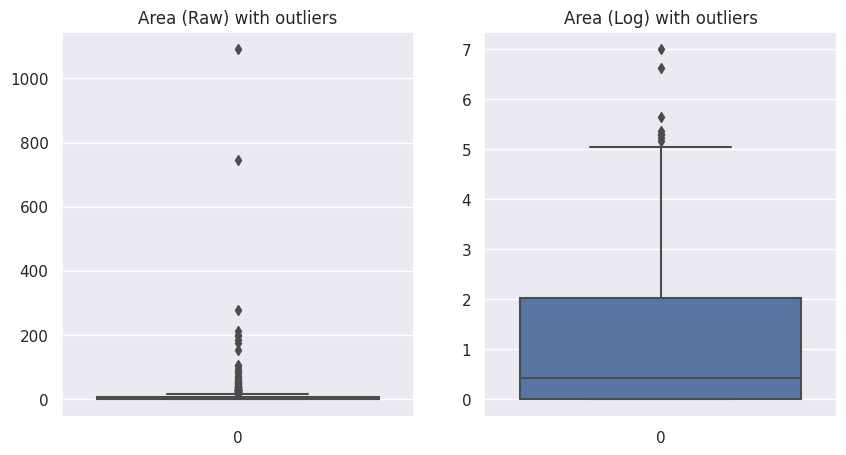

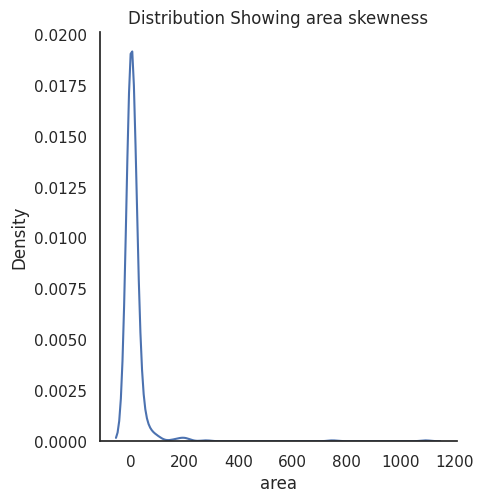

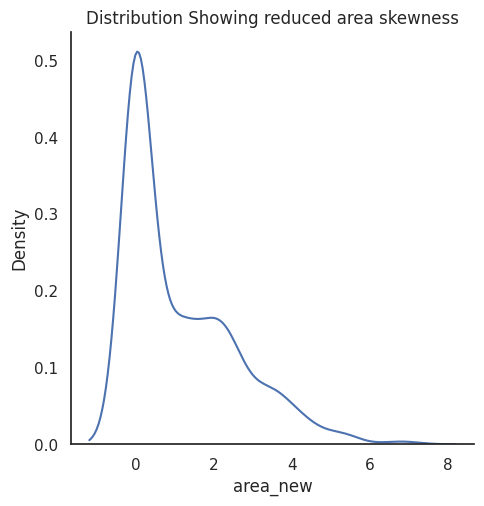

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
abs_area =sns.boxplot(forest['area'])
abs_area.set(title="Area (Raw) with outliers")
plt.subplot(1, 2, 2)
log_area = sns.boxplot(forest['area_new'])
log_area.set(title="Area (Log) with outliers")

plt.rcParams['figure.figsize'] = [10, 5]
sns.set(style = 'white')
# showing both skewed graph and reduced skewness graph
skew_graph = sns.displot(forest['area'],kind='kde')
skew2_graph = sns.displot(forest['area_new'], kind='kde')
skew_graph.set(title='Distribution Showing area skewness')
skew2_graph.set(title='Distribution Showing reduced area skewness')

plt.show()


**Plotting area after removing outliers**

[Text(0.5, 1.0, 'Area (Log) without outliers')]

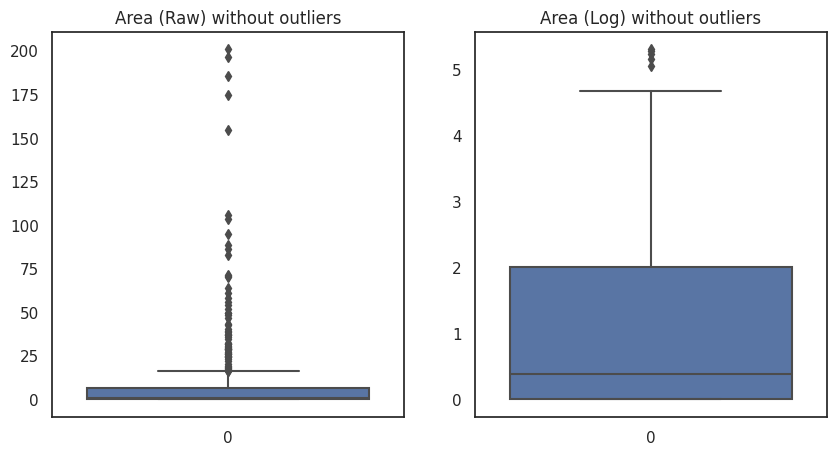

In [ ]:

forest = forest[(forest['area']>=z_lower_bound) & (forest['area'] <=z_upper_bound)]

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
abs_area = sns.boxplot(forest['area'])
abs_area.set(title="Area (Raw) without outliers")
plt.subplot(1, 2, 2)
log_area = sns.boxplot(forest['area_new'])
log_area.set(title="Area (Log) without outliers")

**Interquartile Range method to remove outliers [Exploring Interquartile Range for data balancing]**

In [ ]:
Q1=forest['area'].quantile(0.25)
Q3=forest['area'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

#Outliers will be any points below Lower_Whisker or above Upper_Whisker
forest2=forest[forest['area']<Upper_Whisker]
forest2.shape


(452, 23)

**InterQuartile range removed around ~60 records, since this is significant no. of records w.r.t given data (517),therefore not proceeding with it**

## 3.2 Standardization and Normalization

### Standardization

In [ ]:
scaler = StandardScaler()
standard_selection = [ 'FFMC', 'DMC','DC', 'ISI','RH', 'temp','wind']

standard_df = forest.copy()

# Apply standardization to the columns taken in prev list
standard_df[standard_selection] = scaler.fit_transform(forest[standard_selection])
standard_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_new,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.801689,-1.318194,-1.823095,-0.859088,-1.836047,0.408172,1.494925,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,-0.006342,-1.174525,0.489955,-0.508621,-0.147049,-0.694860,-1.737633,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,-0.006342,-1.044911,0.561584,-0.508621,-0.733028,-0.694860,-1.514698,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.192494,-1.207319,-1.890700,-0.004825,-1.818812,3.227034,-0.009886,0.2,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,-0.241331,-0.926229,-1.791305,0.126600,-1.284537,3.349593,-1.236029,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


**We are using StandardScalar for standardization since the values are having very different ranges [since for such ranges weights assigned to the feature are imbalanced therefore exploring normalization]**

### Normalization

In [ ]:
scaler = MinMaxScaler()
normalize_selection = [ 'FFMC', 'DMC','DC', 'ISI','RH', 'temp','wind']
normal_df = forest.copy()
# Apply normalization to the columns taken in prev list
normal_df[normalize_selection] = scaler.fit_transform(forest[normalize_selection])


**We are using MinMaxScalar for normalization since the values are having very different ranges [since for such ranges weights assigned to the feature are imbalanced therefore exploring normalization]**

## 4 & 5.Training the model with NORMALIZED data with performance evaluation metrics

In [ ]:
model = LinearRegression()

In [ ]:
# Separate the features (X) and target variable (y)

X = normal_df.drop('area', axis=1)
X = X.drop('area_new', axis=1) # Features excluding the 'area' column
y = normal_df['area_new']  # Target variable

for i in range(2,4):
    print("Training the model for test split : ", (i/10))

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    # Create an instance of Linear Regression


    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and Root Mean Square Error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE): %.2f:"% mse)
    print("Root Mean Squared Error (RMSE): %.2f"%np.sqrt(mse))


    r2 = r2_score(y_test, y_pred)
    print("R2 Score ",r2)
    print()

# FOR LOOP for different test sizes

Training the model for test split :  0.2
Mean Squared Error (MSE): 1.40:
Root Mean Squared Error (RMSE): 1.18
R2 Score  0.020693813319278886

Training the model for test split :  0.3
Mean Squared Error (MSE): 1.52:
Root Mean Squared Error (RMSE): 1.23
R2 Score  -0.03596786396487528



## Training the model with STANDARDIZED data with performance evaluation metrics

In [ ]:
# Separate the features (X) and target variable (y)

X = standard_df.drop('area', axis=1)
X = X.drop('area_new', axis=1) # Features excluding the 'area' column
y = standard_df['area_new']  # Target variable

for i in range(2,4):
    print("Training the model for test split : ", (i/10))

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    # Create an instance of Linear Regression


    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and Root Mean Square Error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE): %.2f:"% mse)
    print("Root Mean Squared Error (RMSE): %.2f"%np.sqrt(mse))

    r2 = r2_score(y_test, y_pred)
    print("R2 Score ",r2)
    print()

# FOR LOOP for different test sizes

Training the model for test split :  0.2
Mean Squared Error (MSE): 1.40:
Root Mean Squared Error (RMSE): 1.18
R2 Score  0.020693813319278664

Training the model for test split :  0.3
Mean Squared Error (MSE): 1.52:
Root Mean Squared Error (RMSE): 1.23
R2 Score  -0.03596786396487506



## KFoldCross Validation with 80-20 test split

In [ ]:
X = normal_df.drop('area', axis=1)
X = X.drop('area_new', axis=1)
y = normal_df['area_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=30, random_state=10, shuffle=True)

results = cross_val_score(model, X_train, y_train, cv=kfold)

print("KFold Results: Mean=%.2f MSE=%.2f " % (results.mean(), results.std()))

KFold Results: Mean=-1.36 MSE=6.89 


# From the perfomance metrics we can infer that :

### When we are using standard scaler vs MinMaxScalar there is not much difference in performance of the model

## 5.1 Performance stats

### Test Split : 0.2 -> MSE =1.40 , RMSE=1.18 , R2 =  0.02069
### Test Split : 0.3 -> MSE =1.52 , RMSE=1.23 , R2 = -0.03596
###

### When we are decreasing training data , model is performing worse.

## 5.2
### Model is underfitting for the given data set, this means that we need more training data in order to build a better model .